In [1]:
from google.colab import files
uploaded = files.upload()

Saving cyclistic_cleaned.csv to cyclistic_cleaned.csv


In [5]:
import pandas as pd

df = pd.read_csv("cyclistic_cleaned.csv")  # use the exact filename you uploaded

In [7]:
df['ride_length'] = pd.to_timedelta(df['ride_length'])


In [8]:
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()


In [16]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['day_of_week'] = df['started_at'].dt.day_name()


In [17]:
avg_duration = df.groupby('member_casual')['ride_length_seconds'].mean()
summary_df = avg_duration.reset_index()


In [18]:
import os
os.makedirs('data_cleaned', exist_ok=True)
summary_df.to_csv("data_cleaned/phase-4_summary_tables.csv", index=False)

In [19]:
summary_df = pd.read_csv("data_cleaned/phase-4_summary_tables.csv")
print(summary_df)

  member_casual  ride_length_seconds
0        casual          1584.700268
1        member           815.703285


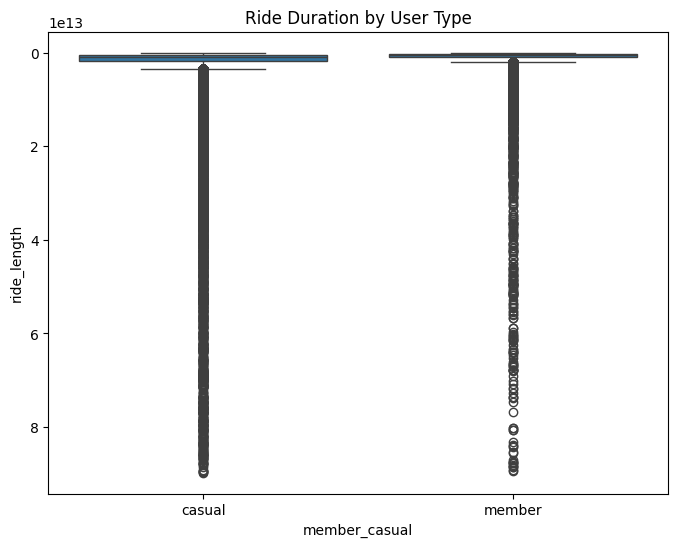

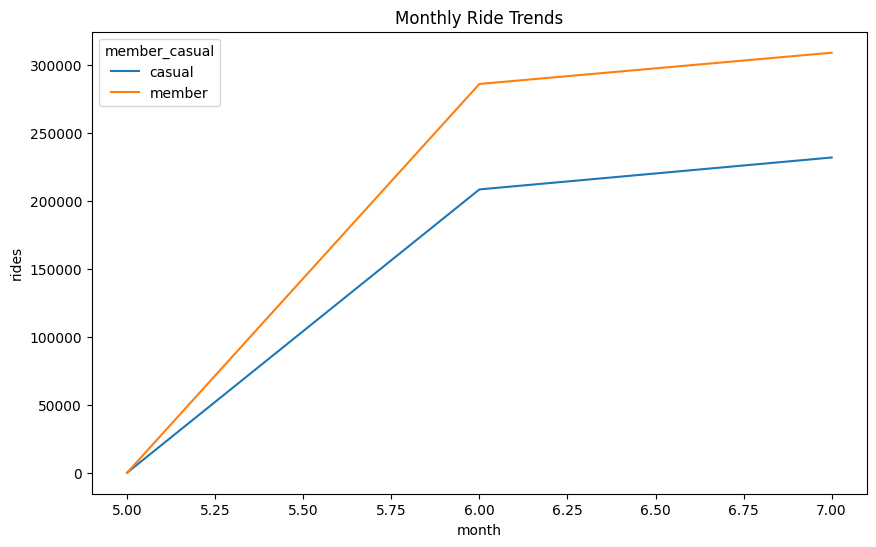

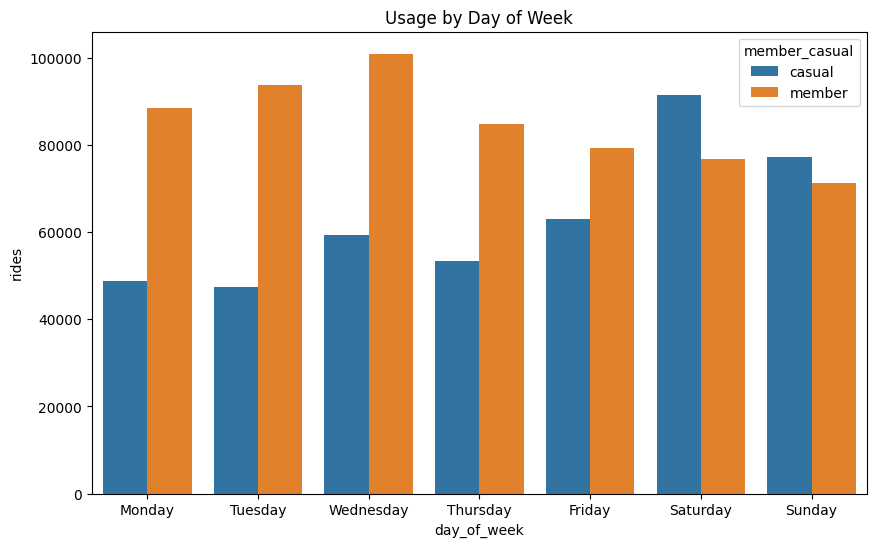

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ride duration by user type
plt.figure(figsize=(8,6))
sns.boxplot(x='member_casual', y='ride_length', data=df)
plt.title('Ride Duration by User Type')
plt.show()

# Monthly ride trends
df['month'] = pd.to_datetime(df['started_at']).dt.month
monthly_trend = df.groupby(['month', 'member_casual']).size().reset_index(name='rides')

plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='rides', hue='member_casual', data=monthly_trend)
plt.title('Monthly Ride Trends')
plt.show()

# Day of week usage
day_trend = df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='rides')

plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='rides', hue='member_casual', data=day_trend,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Usage by Day of Week')
plt.show()



In [30]:
plt.savefig("visuals/monthly_trend.png")


<Figure size 640x480 with 0 Axes>